# Lab | Basic Data Cleaning and EDA

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in the files_for_lab folder.

## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is and claim amounts. 

You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

## Some business Objectives for the case study could be:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### 1. Import the necessary libraries.

In [31]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("pastel", 8)
from ydata_profiling import ProfileReport

%matplotlib inline

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))

In [3]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First, look at its main features (head, shape, info).

In [4]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.shape

(9134, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
eda_report = ProfileReport(df, title = "EDA Report: Insurance Customer Analysis")
eda_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. Rename the columns so they follow the PE8 (snake case).

In [9]:
# Standardize column names (lowercase, replace spaces with underscore)
def standard_cols(dataframe):
    '''Standardize column names into lowercase and replace spaces with underscore.'''
    dataframe.columns = [col.lower().replace(' ','_') for col in dataframe.columns]
standard_cols(df)
df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      policy_type        policy  renew_offer_type  sales_channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  total_claim_amount  vehicle_class vehicle_size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

### 5. Fix the data types of any other column/columns as you might see necessary. 
Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

#### Numerical Variables

In [11]:
numericals = df.select_dtypes(np.number).round(2)
numericals.head()

customer_lifetime_value  income  monthly_premium_auto  \
0                  2763.52   56274                    69   
1                  6979.54       0                    94   
2                 12887.43   48767                   108   
3                  7645.86       0                   106   
4                  2813.69   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1              384.81  
1                          0                   8             1131.46  
2                          0                   2              566.47  
3                          0                   7              529.88  
4                          0                   1              138.13

In [24]:
#Checking unique values of several columns to decide which ones to transform, if any

array([0, 2, 1, 3, 5, 4])

In [28]:
df.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [25]:
#looking at the numerical variables, everything seem to be in order.

array([0, 2, 1, 3, 5, 4])

In [29]:
df.response.unique() # can be changed to boolean 1 and 0

array(['No', 'Yes'], dtype=object)

In [14]:
df.employmentstatus.unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [15]:
df.education.unique() # could be transformed to ordinal categorical

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [34]:
df.renew_offer_type.unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

**There are several transformation that could be done but mostly on the categorical variables. These will be left for later.**

### 6. Plot a correlation matrix, and comment on what you observe.

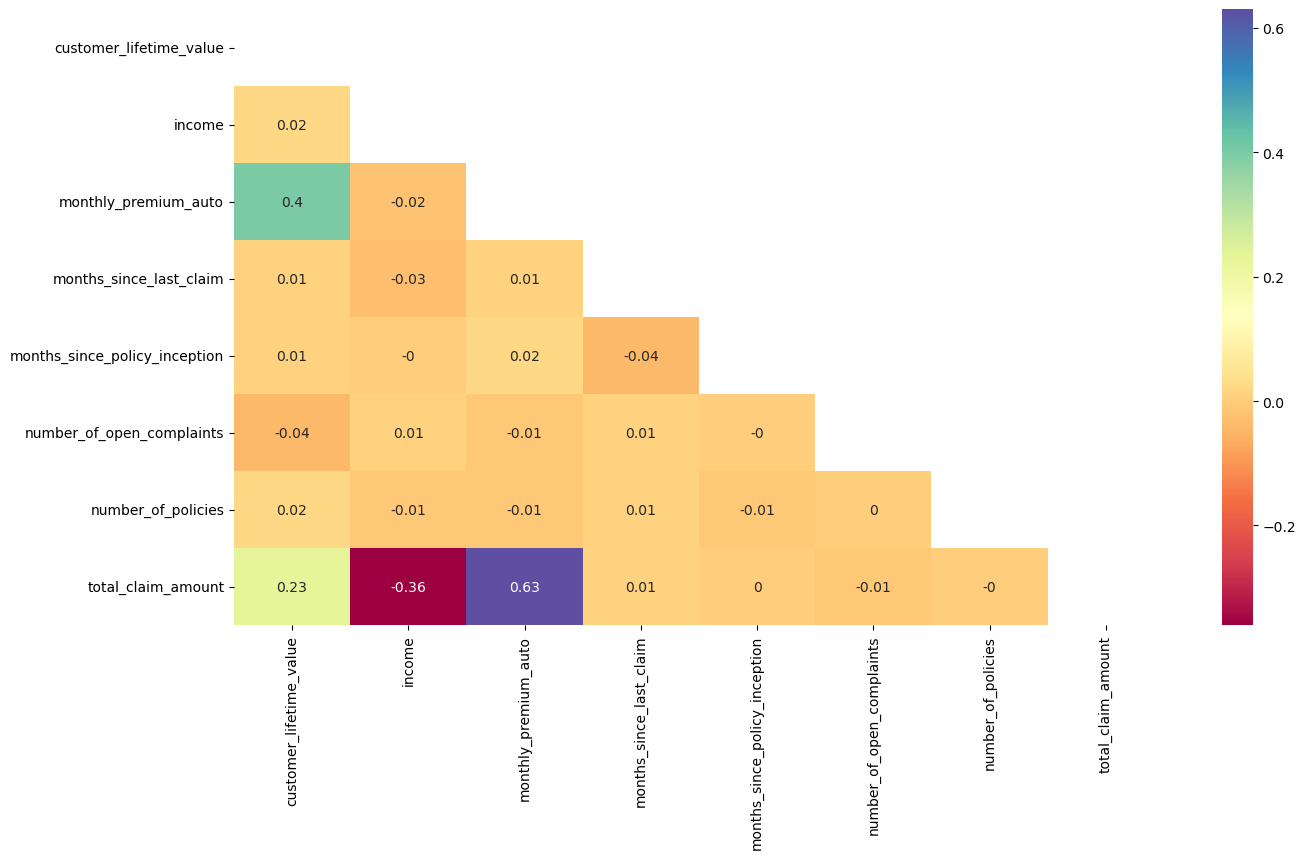

In [33]:
corr = numericals.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.heatmap(corr,cmap = 'Spectral', mask = mask, annot = True)
plt.show()

**Considering customer lifetime value as the target, we can see above a slightly positive relationship between this target and monthly_premium_auto (amount paid for car insurance coverage) and total_claim_amount.**

### 7. Plot every continuous variable. Comment what you can see in the plots.

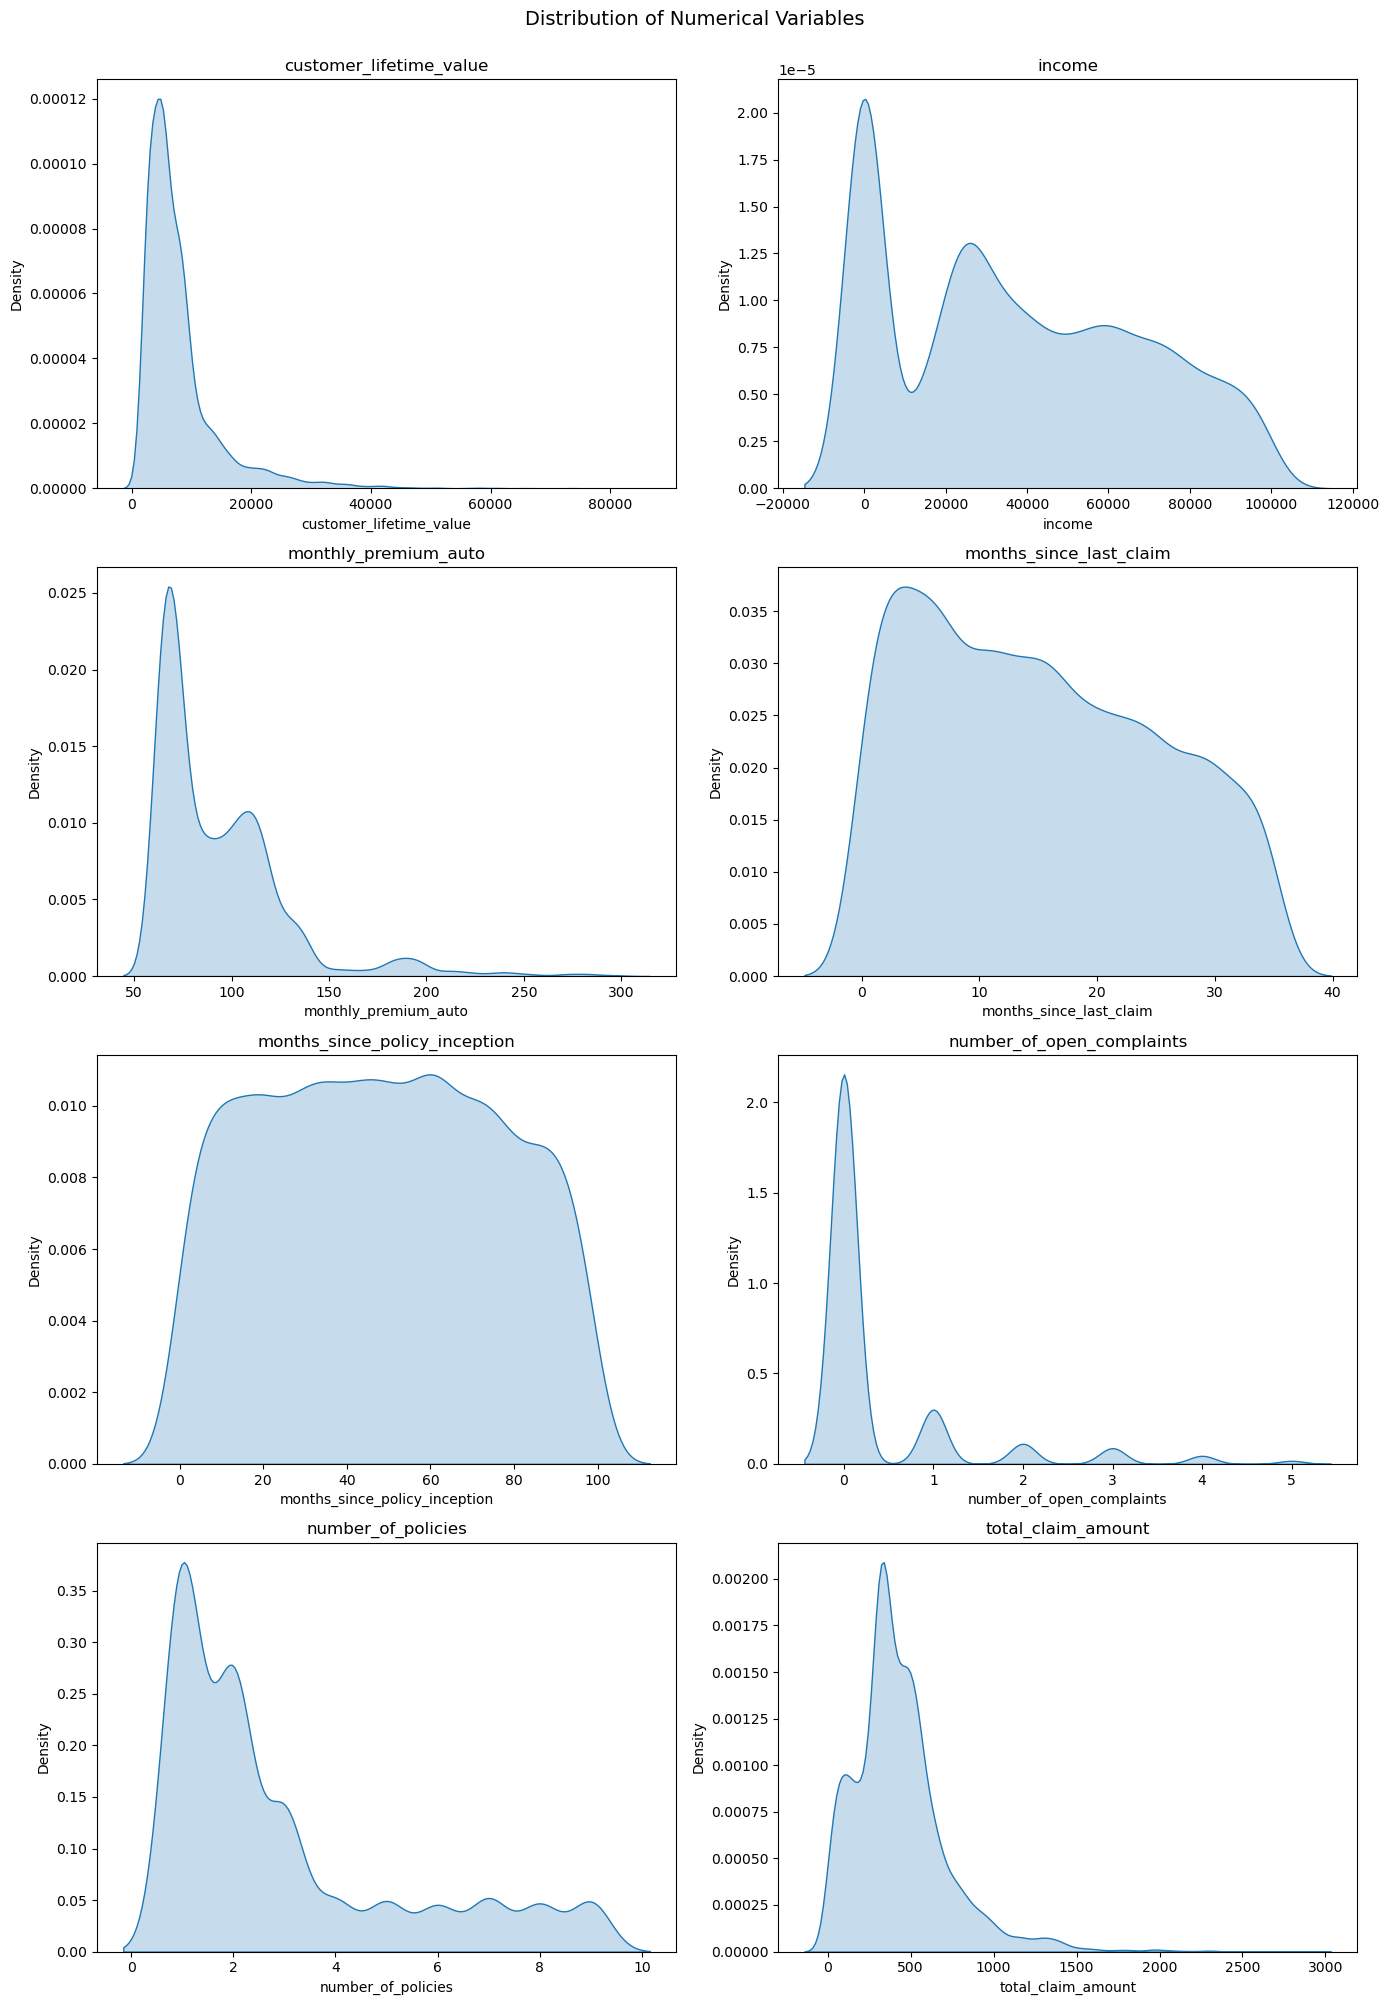

In [158]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (14,20))
plt.suptitle("Distribution of Numerical Variables", fontsize = 14, y=1)

for i in numericals:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(data = numericals, x = i, fill=True)
    c = c + 1
    
plt.tight_layout()
plt.show()

#### **Observations:**
- Most of the variables are skewed to the right. 
- There are a lot of 0 values in the income column which could be treated later by imputation or regression.
- Majority of the clients do not have any open complaints which is good for the insurance company.

### 8. Do the same with the categorical variables.
Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required.

In [18]:
categoricals = df.select_dtypes(object)
categoricals.head()

customer       state response  coverage education effective_to_date  \
0  BU79786  Washington       No     Basic  Bachelor           2/24/11   
1  QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2  AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3  WW63253  California       No     Basic  Bachelor           1/20/11   
4  HB64268  Washington       No     Basic  Bachelor            2/3/11   

  employmentstatus gender location_code marital_status     policy_type  \
0         Employed      F      Suburban        Married  Corporate Auto   
1       Unemployed      F      Suburban         Single   Personal Auto   
2         Employed      F      Suburban        Married   Personal Auto   
3       Unemployed      M      Suburban        Married  Corporate Auto   
4         Employed      M         Rural         Single   Personal Auto   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0  Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1   Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2   Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3  Corporate L2           Offer1   Call Center            SUV      Medsize  
4   Personal L1           Offer1         Agent  Four-Door Car      Medsize

**It is important to delete customer_id before plotting since it is a column with unique values.**

In [19]:
#drop columns with high cardinality before plotting
drop_cols = ['customer', 'effective_to_date']
categoricals.drop(drop_cols, axis=1, inplace=True)

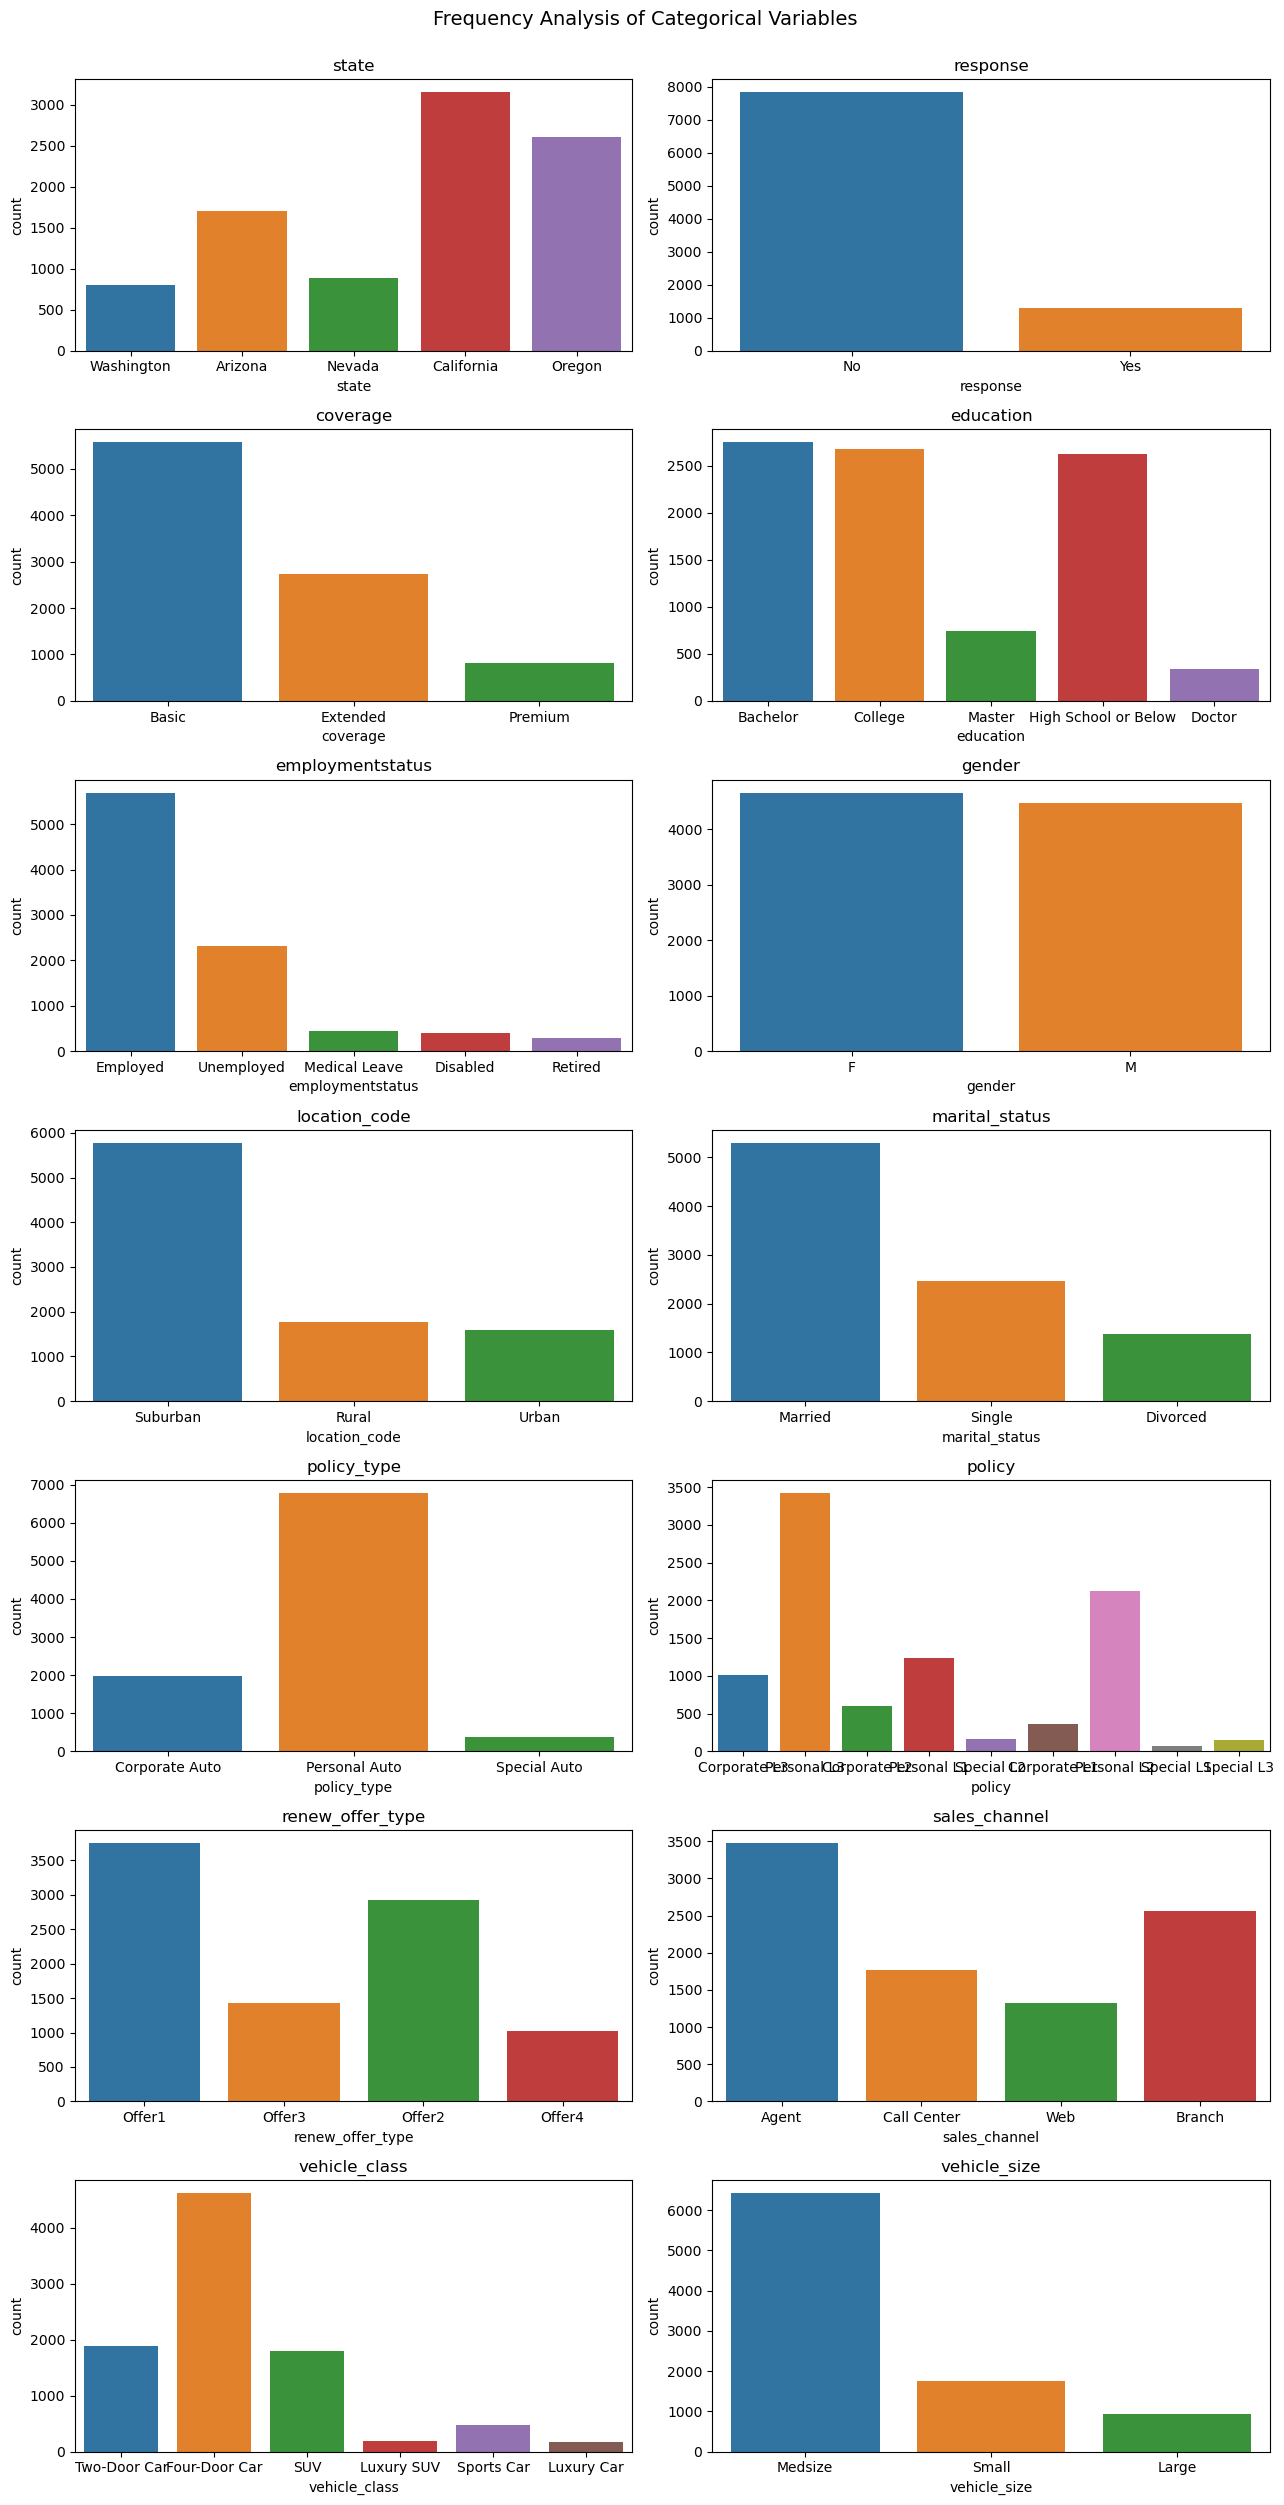

In [133]:
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (13,25))
plt.suptitle("Frequency Analysis of Categorical Variables", fontsize = 14, y=1)

for i in categoricals:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = categoricals, x = i)
    c = c + 1

plt.tight_layout()
plt.show()

#### **Observations:**
- Majority of the clients are situated in the states of California and Oregon.
- There is an huge imbalance in the response column with the vast majority in the No.
- Majority of the insurance coverage is basic, followed by extended coverage and less than 10% with premium coverage.
- Most of the clients are employed.
- Most clients are married.
- Most clients are located in the suburbs.
- Gender distribution is fairly balanced.
- Majority of the insurance are for personal vehicles.
- With regards renew_offer_type columns, it would be helpful to have more information about what they signify.
- In terms of insured vehicles, majority are medium-sized, four-door cars.

In [134]:
# values in columns that need more helpful information
print(categoricals.renew_offer_type.unique())

['Offer1' 'Offer3' 'Offer2' 'Offer4']


### 9. Look for outliers in the continuous variables. In case you find outliers, comment on what you will do with them.

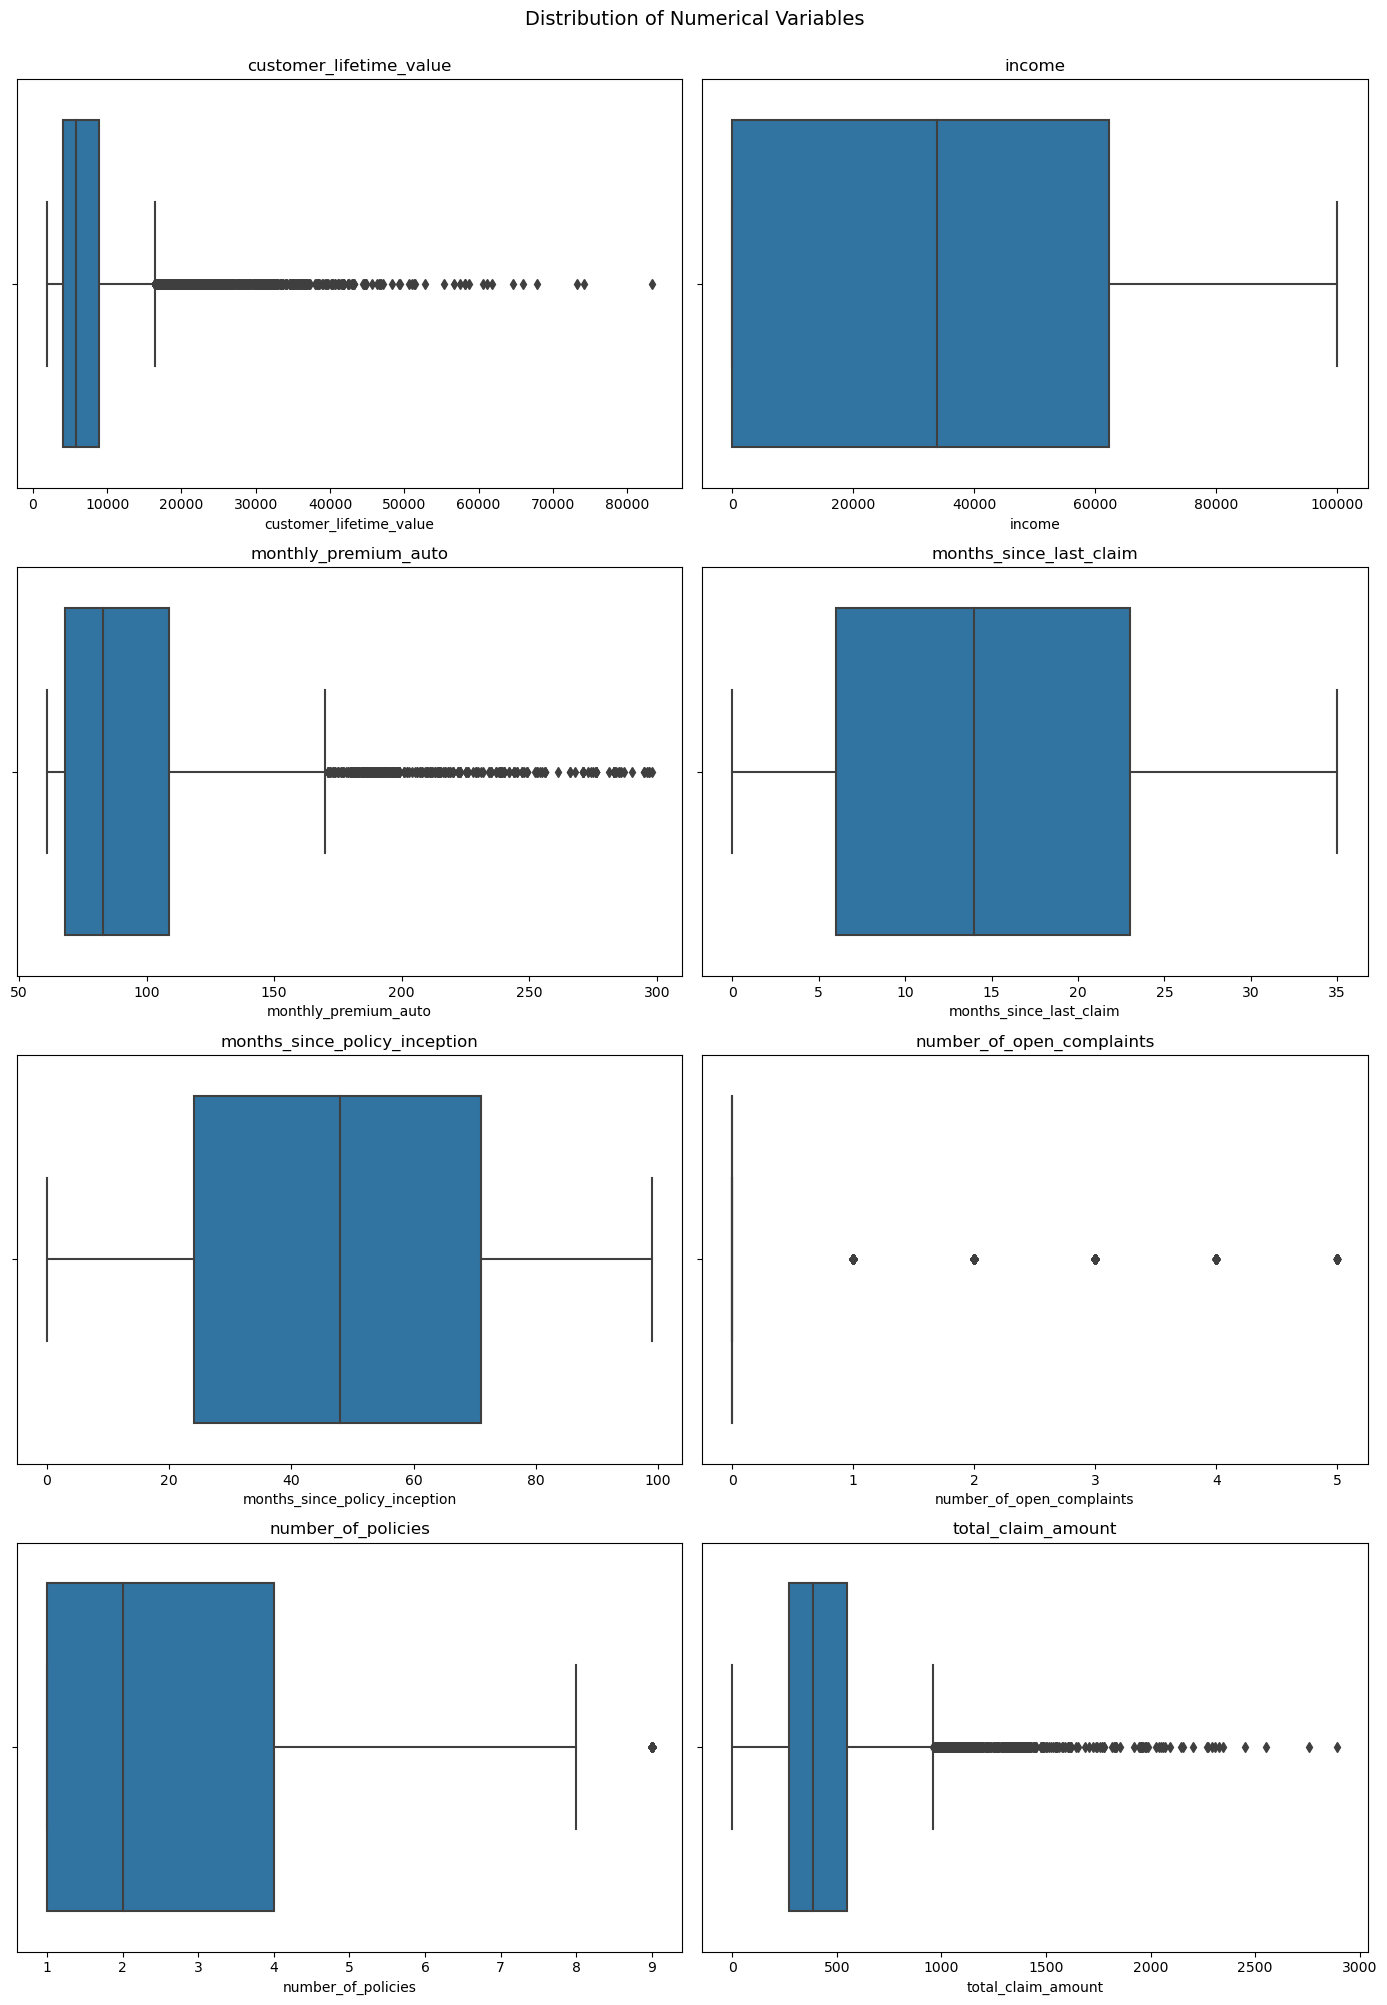

In [160]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (14,20))
plt.suptitle("Distribution of Numerical Variables", fontsize = 14, y=1)

for i in numericals:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = numericals, x = i)
    c = c + 1
    
plt.tight_layout()
plt.show()

#### **Observations:**
We can see outliers on several numerical columns. As we are interested in keeping clients with high lifetime value, it would be best to keep these outliers. The next step is to find out the relationship between high customer lifetime value and the other variables with the goal of keeping profitable clients loyal to the company(higher customer lifetime value compared to total claim amount) and possibly targetting similar profiles.

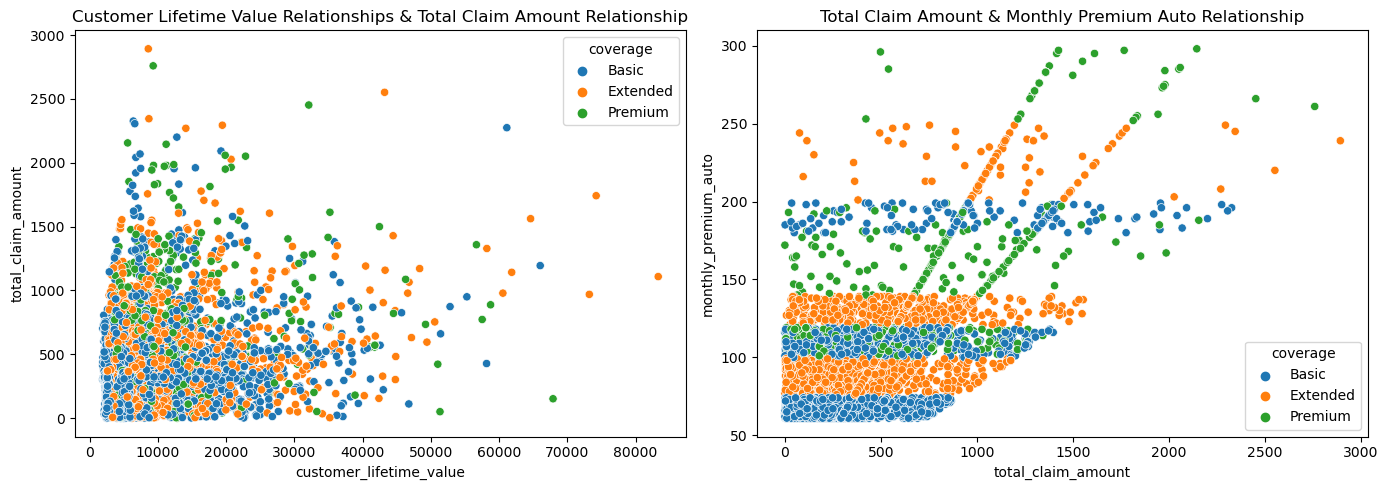

In [187]:
fig = plt.figure(figsize = (14,5))
#plt.suptitle("Customer Lifetime Value Relationships ", fontsize = 18)

#  subplot #1
plt.subplot(121)
plt.title('Customer Lifetime Value Relationships & Total Claim Amount Relationship')
sns.scatterplot(data = df, x = 'customer_lifetime_value', y = 'total_claim_amount', hue='coverage')

#  subplot #2
plt.subplot(122)
plt.title('Total Claim Amount & Monthly Premium Auto Relationship')
sns.scatterplot(data = df, x = 'total_claim_amount', y = 'monthly_premium_auto', hue='coverage')

plt.tight_layout()
plt.show()

### 10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [23]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [229]:
for col in numericals.columns:
    print(col, ": ", (numericals[numericals[col] == 0].shape[0]))


customer_lifetime_value :  0
income :  2317
monthly_premium_auto :  0
months_since_last_claim :  314
months_since_policy_inception :  83
number_of_open_complaints :  7252
number_of_policies :  0
total_claim_amount :  0


**There are no null values in the dataframe. However, looking at the we can see that there are some 0 values in some columns. Only the income column containing these missing values will be treated as it makes sense for the others to have 0 values.**